<a href="https://colab.research.google.com/github/Gokulakrishnan200005/Predicting-energy-consumption-patterns-using-time-series-forcating-for-smart-grids-/blob/main/Prediction_energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install TimeseriesGenerator

ERROR: Could not find a version that satisfies the requirement TimeseriesGenerator (from versions: none)
ERROR: No matching distribution found for TimeseriesGenerator


In [3]:
! pip install

[1.         2.         3.         4.         5.         6.
 5.85957454 5.86048754 5.86140053 5.86231353 5.86322653 5.86413953
 5.86505253 5.86596553 5.86687852 5.86779152 5.86870452 5.86961752
 5.87053052 5.87144352 5.87235651 5.87326951 5.87418251 5.87509551
 5.87600851 5.87692151 5.8778345  5.8787475  5.8796605  5.8805735
 5.8814865  5.88239949 5.88331249 5.88422549 5.88513849 5.88605149
 5.88696449 5.88787748 5.88879048 5.88970348 5.89061648 5.89152948
 5.89244248 5.89335547 5.89426847 5.89518147 5.89609447 5.89700747
 5.89792047 5.89883346 5.89974646 5.90065946 5.90157246 5.90248546
 5.90339846 5.90431145 5.90522445 5.90613745 5.90705045 5.90796345
 5.90887645 5.90978944 5.91070244 5.91161544 5.91252844 5.91344144
 5.91435443 5.91526743 5.91618043 5.91709343 5.91800643 5.91891943]


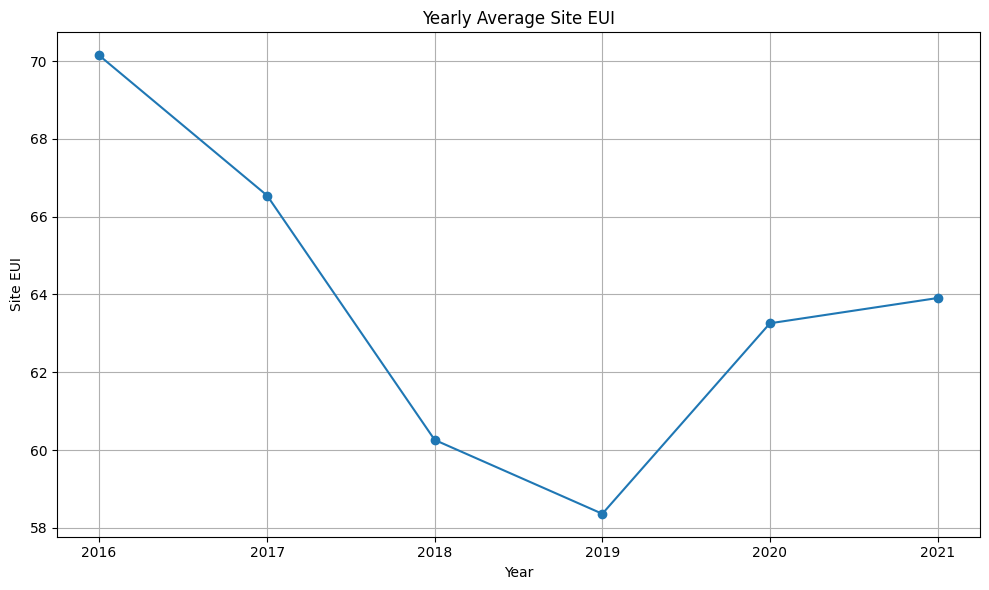

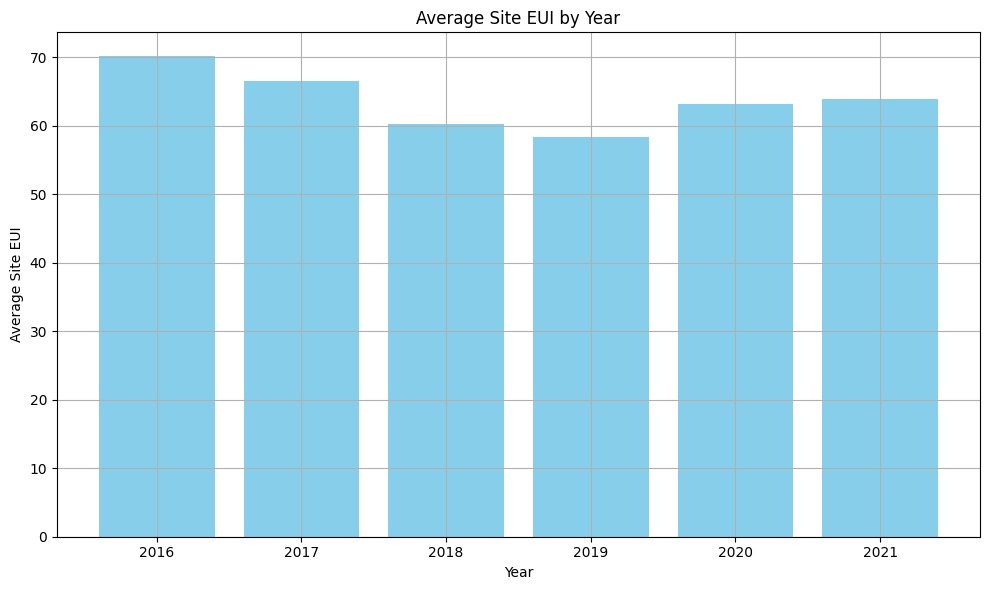

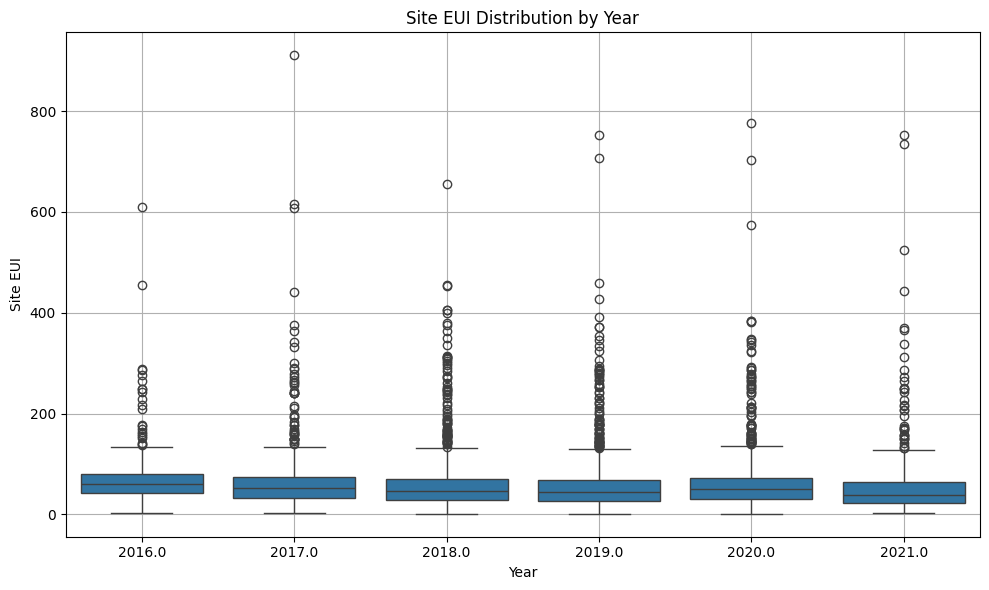

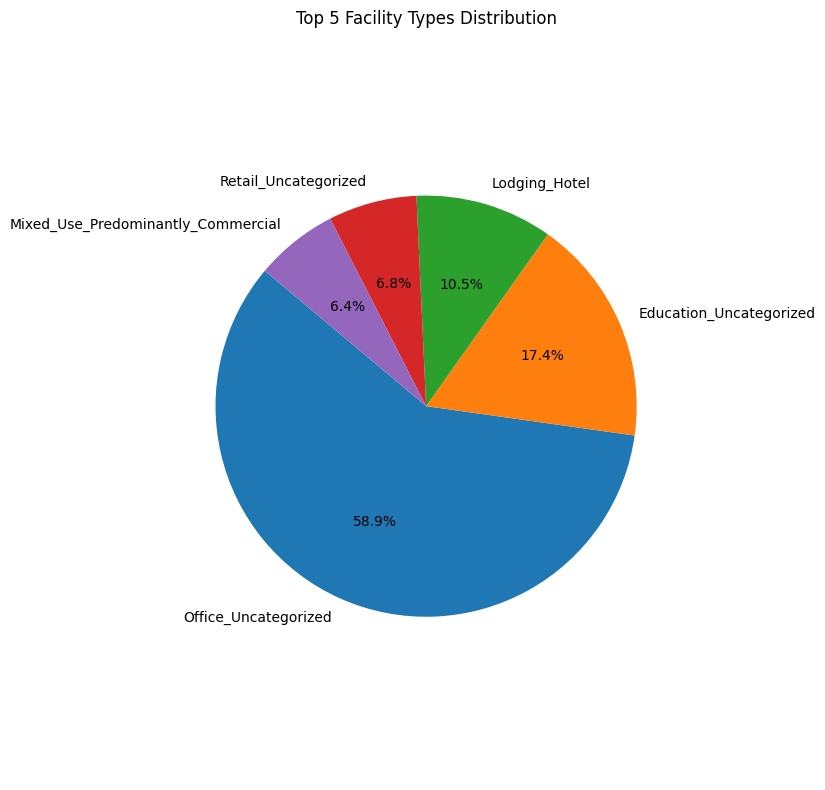

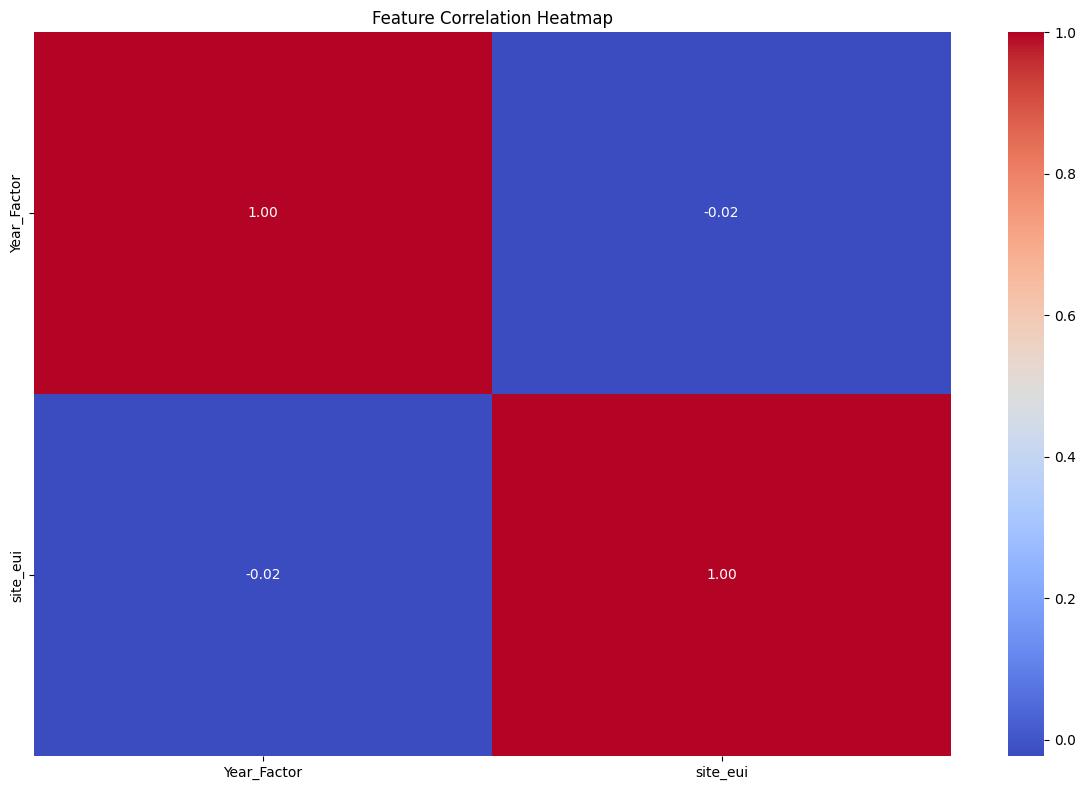

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

{'EDA Summary': '        Year_Factor State_Factor building_class         facility_type floor_area year_built energy_star_rating ELEVATION january_min_temp january_avg_temp january_max_temp february_min_temp february_avg_temp february_max_temp march_min_temp march_avg_temp march_max_temp april_min_temp april_avg_temp april_max_temp may_min_temp may_avg_temp may_max_temp june_min_temp june_avg_temp june_max_temp july_min_temp july_avg_temp july_max_temp august_min_temp august_avg_temp august_max_temp september_min_temp september_avg_temp september_max_temp october_min_temp october_avg_temp october_max_temp november_min_temp november_avg_temp november_max_temp december_min_temp december_avg_temp december_max_temp cooling_degree_days heating_degree_days precipitation_inches snowfall_inches snowdepth_inches     avg_temp days_below_30F days_below_20F days_below_10F days_below_0F days_above_80F days_above_90F days_above_100F days_above_110F direction_max_wind_speed direction_peak_wind_speed m

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


# Step 1: Data Collection

df = pd.read_csv("/content/TRAIN.csv")

# Step 2: Data Preprocessing
df["site_eui"] = pd.to_numeric(df["site_eui"], errors='coerce')
df["Year_Factor"] = pd.to_numeric(df["Year_Factor"], errors='coerce')
df = df.dropna(subset=["site_eui", "Year_Factor"])

# Step 3: EDA
eda_summary = df.describe(include='all')

# Step 4: Feature Engineering
print(df["Year_Factor"].unique())
# Example mapping: adjust based on your actual data
year_map = {
    1.0: 2016,
    2.0: 2017,
    3.0: 2018,
    4.0: 2019,
    5.0: 2020,
    6.0: 2021
}

# Map to actual years
df["Year_Factor"] = df["Year_Factor"].map(year_map)

# Then proceed as before
df_yearly = df.groupby("Year_Factor")["site_eui"].mean().reset_index()
df_yearly.columns = ["ds", "y"]
df_yearly["ds"] = pd.to_datetime(df_yearly["ds"], format="%Y")
# Step 2: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_yearly["ds"], df_yearly["y"], marker='o', linestyle='-')
plt.title("Yearly Average Site EUI")
plt.xlabel("Year")
plt.ylabel("Site EUI")
plt.grid(True)
plt.tight_layout()
plt.show()


df_bar = df.groupby("Year_Factor")["site_eui"].mean().reset_index()
df_bar["Year_Factor"] = df_bar["Year_Factor"].astype(int)

plt.figure(figsize=(10, 6))
plt.bar(df_bar["Year_Factor"], df_bar["site_eui"], color='skyblue')
plt.title("Average Site EUI by Year")
plt.xlabel("Year")
plt.ylabel("Average Site EUI")
plt.grid(True)
plt.tight_layout()
plt.show()




plt.figure(figsize=(10, 6))
sns.boxplot(x="Year_Factor", y="site_eui", data=df)
plt.title("Site EUI Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Site EUI")
plt.grid(True)
plt.tight_layout()
plt.show()


df_pie = df["facility_type"].value_counts().head(5)  # top 5 categories

plt.figure(figsize=(8, 8))
plt.pie(df_pie, labels=df_pie.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Facility Types Distribution")
plt.axis('equal')  # Makes the pie a circle
plt.tight_layout()
plt.show()



plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()





# Step 5A: Time Series Modeling - ARIMA
arima_data = df_yearly.set_index("ds")["y"]
arima_model = ARIMA(arima_data, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=5)

# Step 5B: Time Series Modeling - LSTM
lstm_data = arima_data.values.reshape(-1, 1)
scaler = MinMaxScaler()
lstm_scaled = scaler.fit_transform(lstm_data)

n_input = 3
generator = TimeseriesGenerator(lstm_scaled, lstm_scaled, length=n_input, batch_size=1)
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_input, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(generator, epochs=50, verbose=0)

pred_input = lstm_scaled[-n_input:]
predictions = []
for _ in range(5):
    pred = lstm_model.predict(pred_input.reshape((1, n_input, 1)), verbose=0)
    predictions.append(pred[0][0])
    pred_input = np.append(pred_input, pred)[-n_input:]

lstm_forecast = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Step 6: Forecast Evaluation
last_known_values = df_yearly["y"].values[-5:]
rmse_arima = sqrt(mean_squared_error(last_known_values, arima_forecast[:5]))
rmse_lstm = sqrt(mean_squared_error(last_known_values, lstm_forecast[:5]))

# Step 7: Insights and Recommendations
insights = {
    "RMSE_ARIMA": rmse_arima,
    "RMSE_LSTM": rmse_lstm,
    "Best_Model": "ARIMA" if rmse_arima < rmse_lstm else "LSTM"
}

# Step 8: Report Summary
report = {
    "EDA Summary": eda_summary.to_string(),
    "Forecast Insights": insights,
    "ARIMA Forecast": arima_forecast.tolist(),
    "LSTM Forecast": lstm_forecast.tolist()
}

report


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

# Step 1: Data Collection
file_path = "/mnt/data/TRAIN.csv"
df = pd.read_csv("D:/TRAIN.CSV")

# Step 2: Data Preprocessing
df["site_eui"] = pd.to_numeric(df["site_eui"], errors='coerce')
df["Year_Factor"] = pd.to_numeric(df["Year_Factor"], errors='coerce')
df = df.dropna(subset=["site_eui", "Year_Factor"])

# Step 3: EDA
eda_summary = df.describe(include='all')

# Step 4: Feature Engineering
df_yearly = df.groupby("Year_Factor")["site_eui"].mean().reset_index()
df_yearly.columns = ["ds", "y"]
df_yearly["ds"] = pd.to_datetime(df_yearly["ds"], format="%Y")

# Step 5A: Time Series Modeling - ARIMA
arima_data = df_yearly.set_index("ds")["y"]
arima_model = ARIMA(arima_data, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=5)

# Step 5B: Time Series Modeling - LSTM
lstm_data = arima_data.values.reshape(-1, 1)
scaler = MinMaxScaler()
lstm_scaled = scaler.fit_transform(lstm_data)

n_input = 3
generator = TimeseriesGenerator(lstm_scaled, lstm_scaled, length=n_input, batch_size=1)
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_input, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(generator, epochs=50, verbose=0)

pred_input = lstm_scaled[-n_input:]
predictions = []
for _ in range(5):
    pred = lstm_model.predict(pred_input.reshape((1, n_input, 1)), verbose=0)
    predictions.append(pred[0][0])
    pred_input = np.append(pred_input, pred)[-n_input:]

lstm_forecast = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Step 6: Forecast Evaluation
last_known_values = df_yearly["y"].values[-5:]
rmse_arima = sqrt(mean_squared_error(last_known_values, arima_forecast[:5]))
rmse_lstm = sqrt(mean_squared_error(last_known_values, lstm_forecast[:5]))

# Step 7: Insights and Recommendations
insights = {
    "RMSE_ARIMA": rmse_arima,
    "RMSE_LSTM": rmse_lstm,
    "Best_Model": "ARIMA" if rmse_arima < rmse_lstm else "LSTM"
}

# Step 8: Report Summary
report = {
    "EDA Summary": eda_summary.to_string(),
    "Forecast Insights": insights,
    "ARIMA Forecast": arima_forecast.tolist(),
    "LSTM Forecast": lstm_forecast.tolist()
}

report
